BERKAY ALTINTAŞ
22002709

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
data = pd.read_csv('heart_cleveland_upload.csv')

In [3]:
data_decision_tree = data

In [4]:
data.shape

(297, 14)

In [5]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [6]:
data.info()  # It can be seen that we don't have any missing values. All data is non-null. Moreover, we can see that 13 attributes have integer format. However, some them should be categorical as well.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


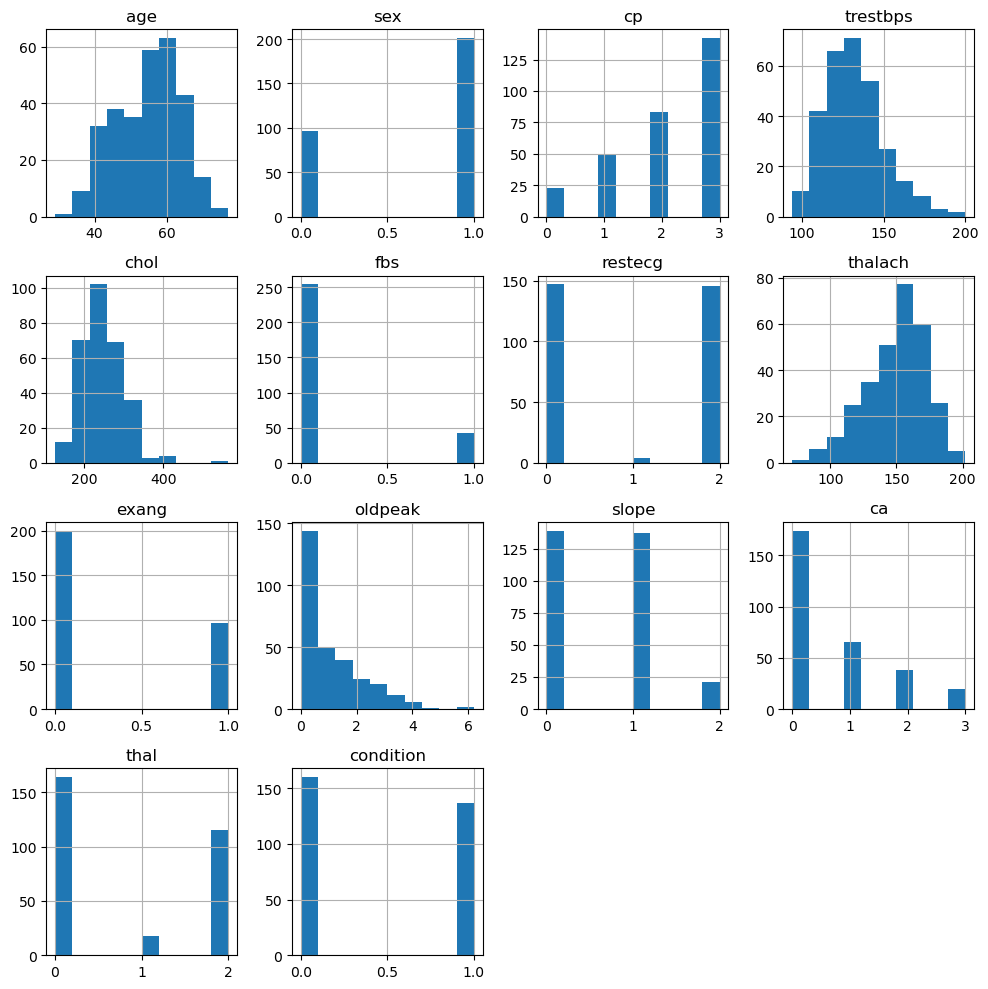

In [8]:
data.hist(figsize = (10,10))
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='condition', ylabel='count'>

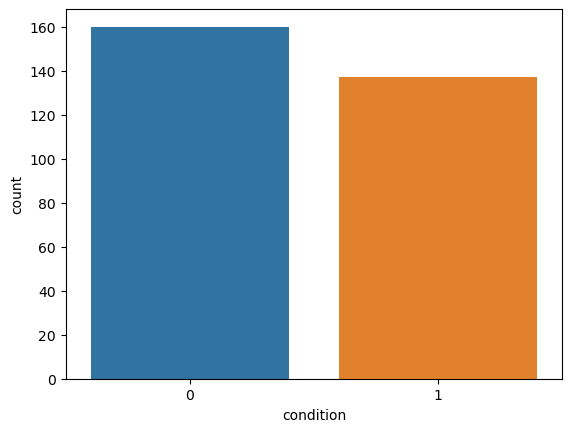

In [9]:
sns.countplot(x = 'condition', data = data)  # Condition represent whether there is a heart disease ( condition = 1) or not (condition = 0)

In [10]:
data.condition.value_counts()          # So we have 160 heart disease case, 137 no heart disease case.

0    160
1    137
Name: condition, dtype: int64

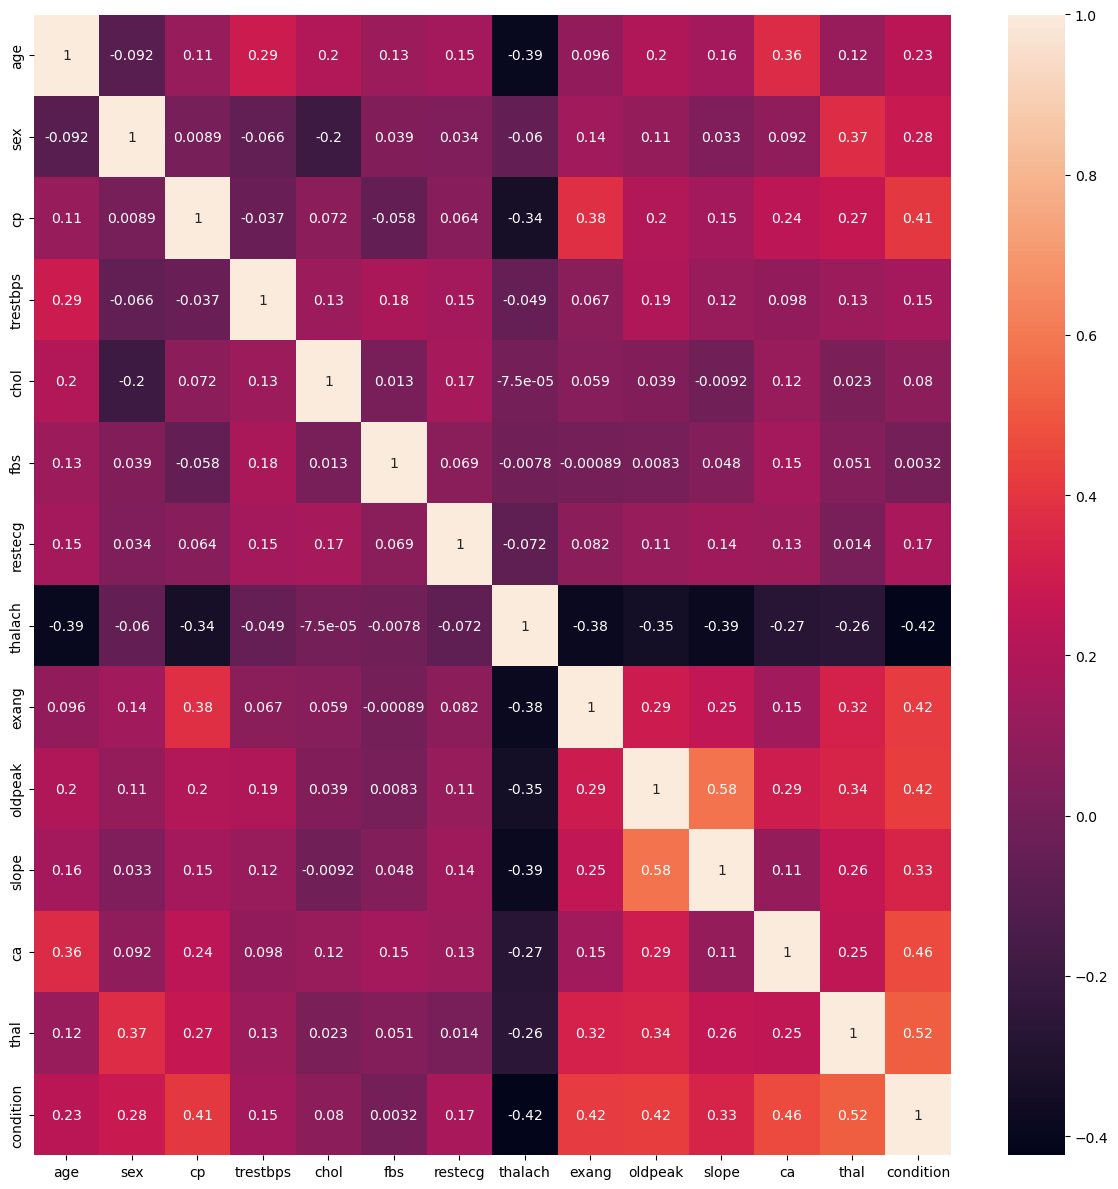

In [11]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 12)) 
sns.heatmap(correlation_matrix, annot = True)      # So far we looked at the attributes individually. Now let's look at how they are related with each other using correlation matrix.
plt.tight_layout()

In [12]:
# We have some categorical values. We have to use one-hot encodng to represent them.
# Our categorical features are sex, cp, fbs, restecg, exang, slope, ca, thal, condition
# Noncategorical features are age, trestbps, chol, thalach, old peak
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] # 'condition' is already either 0 or 1 so no need for one-hot encoding.

In [13]:
encoded_data = pd.get_dummies(data, columns = categorical_features)
encoded_data.head(20)

,age,trestbps,chol,thalach,oldpeak,condition,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,69,160,234,131,0.1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,69,140,239,151,1.8,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,66,150,226,114,2.6,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,65,138,282,174,1.4,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,64,110,211,144,1.8,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
5,64,170,227,155,0.6,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
6,63,145,233,150,2.3,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
7,61,134,234,145,2.6,1,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
8,60,150,240,171,0.9,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
9,59,178,270,145,4.2,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,1


In [14]:
# To increase the readibility of the table, we can change the name of columns
encoded_data.rename(columns = {'fbs_0': 'fbs ≤ 120'}, inplace = True)
encoded_data.rename(columns = {'fbs_1': 'fbs > 120'}, inplace = True)
encoded_data.rename(columns = {'sex_0': 'Female'}, inplace = True)
encoded_data.rename(columns = {'sex_1': 'Male'}, inplace = True)

encoded_data.head(20)

,age,trestbps,chol,thalach,oldpeak,condition,Female,Male,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,69,160,234,131,0.1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,69,140,239,151,1.8,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,66,150,226,114,2.6,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,65,138,282,174,1.4,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,64,110,211,144,1.8,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
5,64,170,227,155,0.6,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
6,63,145,233,150,2.3,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
7,61,134,234,145,2.6,1,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
8,60,150,240,171,0.9,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
9,59,178,270,145,4.2,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,1


In [15]:
# We completed the one-hot encoding for categorical features. Now, it is time to handle the non-categorical features.
# Non-categorical values are continuous and they have different ranges. Therefore, we have to apply standartization.
# To do so, we will transform feature by subtracting the mean and dividing by standart deviation.

In [16]:
encoded_data.describe()

,age,trestbps,chol,thalach,oldpeak,condition,Female,Male,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,...,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.461279,0.323232,0.676768,0.077441,0.164983,...,0.468013,0.461279,0.070707,0.585859,0.218855,0.127946,0.067340,0.552189,0.060606,0.387205
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.499340,0.468500,0.468500,0.267741,0.371792,...,0.499818,0.499340,0.256768,0.493404,0.414168,0.334594,0.251033,0.498108,0.239009,0.487933
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Noncategorical features are age, trestbps, chol, thalach, old peak.
age_mean, age_std = encoded_data['age'].mean(), encoded_data['age'].std()
encoded_data['age'] = (encoded_data['age'] - age_mean) / age_std

trestbps_mean, trestbps_std = encoded_data['trestbps'].mean(), encoded_data['trestbps'].std()
encoded_data['trestbps'] = (encoded_data['trestbps'] - trestbps_mean) / trestbps_std

chol_mean, chol_std = encoded_data['chol'].mean(), encoded_data['chol'].std()
encoded_data['chol'] = (encoded_data['chol'] - chol_mean) / chol_std

thalach_mean, thalach_std = encoded_data['thalach'].mean(), encoded_data['thalach'].std()
encoded_data['thalach'] = (encoded_data['thalach'] - thalach_mean) / thalach_std

oldpeak_mean, oldpeak_std = encoded_data['oldpeak'].mean(), encoded_data['oldpeak'].std()
encoded_data['oldpeak'] = (encoded_data['oldpeak'] - oldpeak_mean) / oldpeak_std


In [18]:
encoded_data.head(10)    # Let's see our standartized data.

,age,trestbps,chol,thalach,oldpeak,condition,Female,Male,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,1.597606,1.593577,-0.256746,-0.810726,-0.819430,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1.597606,0.467629,-0.160588,0.061054,0.638393,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,1.266105,1.030603,-0.410599,-1.551739,1.324427,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,1.155604,0.355034,0.666374,1.063601,0.295376,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,1.045104,-1.221294,-0.699074,-0.244069,0.638393,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
5,1.045104,2.156551,-0.391368,0.235410,-0.390658,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
6,0.934603,0.749116,-0.275978,0.017465,1.067164,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
7,0.713602,0.129844,-0.256746,-0.200480,1.324427,1,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
8,0.603102,1.030603,-0.141356,0.932834,-0.133396,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
9,0.492601,2.606930,0.435594,-0.200480,2.696495,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,1


In [19]:
def evaluation_metrics(y_pred, y_test):           # Accuracy, confusion_matrix, precision, recall, F1 Score
    tp, fp, fn, tn = 0, 0, 0, 0
    tp = np.sum((y_pred == 1) & (y_test == 1))     # True Positive
    fp = np.sum((y_pred == 1) & (y_test == 0))     # False Positive
    fn = np.sum((y_pred == 0) & (y_test == 1))     # False Negative
    tn = np.sum((y_pred == 0) & (y_test == 0))     # True Negative


    if (tp + fp + fn + tn) != 0:
        accuracy = (tp + tn) / (tp + fp + fn + tn) 
    else: 
        accuracy = 0

    if (tp + fp) != 0:
        precision = (tp) / (tp + fp)
    else:
        precision = 0

    if (tp + fn) != 0:
        recall = (tp) / (tp + fn)
    else: 
        recall = 0

    if precision + recall != 0:
        F1_score = 2 * (precision * recall) / (precision + recall)
    else:
        F1_score = 0

    
              
    confusion_matrix_columns = ['Actual = 1', 'Actual = 0']
    confusion_matrix_rows = ['Prediction = 1', 'Prediction = 0']
    values = [[tp, fp], [fn, tn]]

    confusion_matrix = pd.DataFrame(values, index = confusion_matrix_rows, columns = confusion_matrix_columns)

    return accuracy, precision, recall, F1_score, confusion_matrix

                    
    
    
    
    
    
    


In [20]:
# So far we have completed data understanding, data preprocessing, standartization and evaluation metrics. 
# However, before applying any machine algorithm to our dataset, we first split our dataset into training, validation and testing parts.

data.info()     # We have 297 data in total.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [21]:
X = data.drop('condition', axis = 1)
y = data['condition']
X.values.shape, y.values.shape
type(X.values), type(y.values)
data.index

RangeIndex(start=0, stop=297, step=1)

In [22]:
def splitting_dataset(data, y, validation_size, test_size):  
    num_total_samples = data.shape[0]
    shuffled_samples = np.random.permutation(data.index)          # First shuffle the samples
    
    validation_size = int(num_total_samples * validation_size)
    test_size = int(num_total_samples * test_size)
    training_size = num_total_samples - (validation_size + test_size)
    
    training_samples = shuffled_samples[: training_size]                          # Approximately %70 of total samples
    validation_samples = shuffled_samples[training_size: training_size + validation_size]          # Approximately %15 of total samples
    test_samples = shuffled_samples[training_size + validation_size: ]                            # Approxiamtely %15 of total samples

    # Now, we have to represent our splitted data in different DataFrames.
    training_df = data.iloc[training_samples]
    validation_df = data.iloc[validation_samples]
    test_df = data.iloc[test_samples]

    # Now, seperate the data into features and target.
    X_training = training_df.drop([y], axis = 1)                 # Drop the target from column
    y_training = training_df[y]                                  # Save only target

    X_validation = validation_df.drop([y], axis = 1)
    y_validation = validation_df[y]

    X_test = test_df.drop([y], axis = 1)
    y_test = test_df[y]


    return X_training, y_training, X_validation, y_validation, X_test, y_test
    
    
    

In [23]:
# Now, let's try our splitting_dataset function. Remember we have 297 data in total.
X_training, y_training, X_validation, y_validation, X_test, y_test = splitting_dataset(data = encoded_data, y = 'condition', validation_size = 0.15, test_size = 0.15)
print('Shape of X_training:', X_training.shape)
print('Shape of y_training:', y_training.shape)
print('Shape of X_validation:', X_validation.shape)
print('Shape of y_validation:', y_validation.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_training: (209, 28)
Shape of y_training: (209,)
Shape of X_validation: (44, 28)
Shape of y_validation: (44,)
Shape of X_test: (44, 28)
Shape of y_test: (44,)


In [24]:
encoded_data.head(10)

,age,trestbps,chol,thalach,oldpeak,condition,Female,Male,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,1.597606,1.593577,-0.256746,-0.810726,-0.819430,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,1.597606,0.467629,-0.160588,0.061054,0.638393,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,1.266105,1.030603,-0.410599,-1.551739,1.324427,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,1.155604,0.355034,0.666374,1.063601,0.295376,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,1.045104,-1.221294,-0.699074,-0.244069,0.638393,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
5,1.045104,2.156551,-0.391368,0.235410,-0.390658,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
6,0.934603,0.749116,-0.275978,0.017465,1.067164,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
7,0.713602,0.129844,-0.256746,-0.200480,1.324427,1,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
8,0.603102,1.030603,-0.141356,0.932834,-0.133396,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
9,0.492601,2.606930,0.435594,-0.200480,2.696495,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,1


In [25]:
class Logistic_Regression:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epoch = epochs
        self.w = None
        
    def sigmoid(self, z):
         sigmoid = 1 / (1 + np.exp(-z))   # score/probability of the positive class
         return sigmoid

    def training_logistic(self, X, y):
        num_of_samples, num_of_features = X.shape
        X_biased = np.hstack((np.ones((num_of_samples, 1)), X)) 
        self.w = np.zeros(X_biased.shape[1]) # We have a weight for each feature. w is column vector.
        for epoch in range(self.epoch):
            z = np.dot(X_biased, self.w)
            y_score = self.sigmoid(z)    # Related scores/probabilities.
            error = y - y_score
            gradient = np.dot(X_biased.T, error)
            self.w = self.w + self.learning_rate * gradient

    def score_prediction(self, X):
        X_biased = np.hstack((np.ones((X.shape[0], 1)), X))
        z = np.dot(X_biased, self.w)
        score_prediction = self.sigmoid(z)
        return score_prediction

    def prediction(self, X, threshold = 0.5):
        X_biased = np.hstack((np.ones((X.shape[0], 1)), X))
        y_scores = self.score_prediction(X)
        predictions = np.zeros(X.shape[0])                 # Number of predictions = number of samples

        for index, y_score in enumerate(y_scores):                # We need corresponding index to update prediction's terms either as 0 or 1.
            if y_score >= threshold:
                predictions[index] = 1
            else:
                predictions[index] = 0
        return predictions
                
            
        
    

In [26]:
# I have splitted this into three parts. However, to see the result without cross validation, I concatenate the
# training and validation sets again. As a results, I have splitted the entire dataset 
# as %85 training and %15 testing.
X_training = np.concatenate((X_training, X_validation), axis=0)            
y_training = np.concatenate((y_training, y_validation), axis=0)

In [27]:
start_time_model_1 = time.time()
model_1 = Logistic_Regression(learning_rate = 0.001, epochs = 500)
model_1.training_logistic(X_training, y_training)
end_time_model_1 = time.time()
elapsed_time = end_time_model_1 - start_time_model_1
print('Elapsed_time:', elapsed_time)
model_1_pred = model_1.prediction(X_test)
accuracy, precision, recall, F1_score, confusion_matrix = evaluation_metrics(y_pred = model_1_pred, y_test = y_test.values)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1_Score:', F1_score)
confusion_matrix

Elapsed_time: 0.006977558135986328
Accuracy: 0.9318181818181818
Precision: 1.0
Recall: 0.8421052631578947
F1_Score: 0.9142857142857143


,Actual = 1,Actual = 0
Prediction = 1,16,0
Prediction = 0,3,25


In [28]:
def kfold_cross_validation(data, k, learning_rates, epochs, test_size):
    number_of_samples = data.shape [0]
    highest_accuracy = 0
    optimal_accuracies = []
    optimal_precisions = []
    optimal_recalls = []
    optimal_F1_scores = []
    hyperparameter_results = []
    optimal_parameters = {'learning_rate': None, 'epochs': None}
    shuffled_samples = np.random.permutation(data.index)
    test_size = int(number_of_samples * test_size)                        
    training_and_validation_size = number_of_samples - test_size            # Seperate the test data to evaluate the performance of the model later.
    

    test_samples = shuffled_samples[: test_size]                          
    training_and_validation_samples = shuffled_samples[test_size: ]  
    test_samples_df = data.iloc[test_samples]
    training_and_validation_samples_df = data.iloc[training_and_validation_samples]
    X_test_cv = test_samples_df.drop('condition', axis = 1)
    y_test_cv = test_samples_df['condition']
    X_without_test_cv = training_and_validation_samples_df.drop('condition', axis = 1)
    y_without_test_cv = training_and_validation_samples_df['condition']
    
    fold_size = training_and_validation_size // k     # To make the size integer.

    for learning_rate in learning_rates:
        for epoch in epochs:
            accuracies, precisions, recalls, F1_scores = [], [], [], []
            for fold in range(k):
                fold_starting = fold_size * fold
                if fold < k - 1:
                    fold_ending = fold_starting + fold_size
                elif fold == k:
                    fold_ending = len(data)

                validation_fold = training_and_validation_samples_df.iloc[fold_starting: fold_ending]
                training_folds = pd.concat([training_and_validation_samples_df.iloc[: fold_starting], training_and_validation_samples_df.iloc[fold_ending: ]])         # Concatenate intervals outside the validation_fold
                X_training = training_folds.drop('condition', axis = 1)
                y_training = training_folds['condition']
                X_validation = validation_fold.drop('condition', axis = 1)
                y_validation = validation_fold['condition']

                model_1_with_cv = Logistic_Regression(learning_rate = learning_rate, epochs = epoch)
                model_1_with_cv.training_logistic(X_training, y_training)
                model_1_with_cv_pred = model_1_with_cv.prediction(X_validation)

                accuracy, precision, recall, F1_score, confusion_matrix = evaluation_metrics(y_pred = model_1_with_cv_pred, y_test = y_validation)
                accuracies.append(accuracy)
                precisions.append(precision)
                recalls.append(recall)
                F1_scores.append(F1_score)

            average_accuracy = np.mean(accuracies)
            average_precision = np.mean(precisions)
            average_recall = np.mean(recalls)
            average_F1_score = np.mean(F1_scores)

            hyperparameter_results.append({
                'learning_rate': learning_rate,
                'epochs': epoch,
                'avg_accuracy': average_accuracy,
                'avg_precision': average_precision,
                'avg_recall': average_recall,
                'avg_F1_score': average_F1_score
            })

            if average_accuracy > highest_accuracy:
                highest_accuracy = average_accuracy
                optimal_parameters = {'learning_rate': learning_rate, 'epochs': epoch}
                optimal_accuracies = accuracies
                optimal_precisions = precisions
                optimal_recalls = recalls
                optimal_F1_scores = F1_scores
            

    results_df = pd.DataFrame(hyperparameter_results)
                
    print(f"Best Learning Rate: {optimal_parameters['learning_rate']}")
    print(f"Best Epochs: {optimal_parameters['epochs']}")
    print("Average Accuracy:", round(np.mean(optimal_accuracies), 4))
    print("Average Precision:", round(np.mean(optimal_precisions), 4))
    print("Average Recall:", round(np.mean(optimal_recalls), 4))
    print("Average F1-Score:", round(np.mean(optimal_F1_scores), 4))
    return optimal_parameters, highest_accuracy, results_df, X_test, y_test, X_without_test_cv, y_without_test_cv  
                




                    
                    
                
            
    
    

In [29]:
# Example usage
optimal_parameters, best_accuracy, results_cv_df, X_test_cv, y_test_cv, X_without_test_cv, y_without_test_cv  = kfold_cross_validation(data = encoded_data, k=5, learning_rates=[0.1, 0.01, 0.001], epochs=[100, 300, 500], test_size = 0.15)


Best Learning Rate: 0.001
Best Epochs: 100
Average Accuracy: 0.676
Average Precision: 0.7089
Average Recall: 0.6303
Average F1-Score: 0.6664


In [30]:
results_cv_df

,learning_rate,epochs,avg_accuracy,avg_precision,avg_recall,avg_F1_score
0,0.100,100,0.624,0.658278,0.600348,0.604324
1,0.100,300,0.664,0.683415,0.645739,0.657486
2,0.100,500,0.656,0.668126,0.654435,0.653682
3,0.010,100,0.664,0.681522,0.641043,0.658920
4,0.010,300,0.652,0.677372,0.616986,0.643951
5,0.010,500,0.652,0.677372,0.616986,0.643951
6,0.001,100,0.676,0.708903,0.630319,0.666403
7,0.001,300,0.676,0.701976,0.639014,0.668174
8,0.001,500,0.668,0.689130,0.641043,0.662491


In [31]:
optimal_learning_rate = optimal_parameters['learning_rate']
optimal_epochs = optimal_parameters['epochs']


In [32]:
start_time_model_1_cv = time.time()
model_1_cv = Logistic_Regression(learning_rate = optimal_learning_rate, epochs = optimal_epochs)
model_1_cv.training_logistic(X_without_test_cv, y_without_test_cv)
end_time_model_1_cv = time.time()
elapsed_time_cv = end_time_model_1_cv - start_time_model_1_cv
print('Elapsed_time_cv:', elapsed_time_cv)
model_1_cv_pred = model_1_cv.prediction(X_test_cv)
accuracy, precision, recall, F1_score, confusion_matrix = evaluation_metrics(y_pred = model_1_cv_pred, y_test = y_test_cv)

print('Accuracy_cv:', accuracy)
print('Precision_cv:', precision)
print('Recall_cv:', recall)
print('F1_Score_cv:', F1_score)
confusion_matrix

Elapsed_time_cv: 0.01100468635559082
Accuracy_cv: 0.9318181818181818
Precision_cv: 1.0
Recall_cv: 0.8421052631578947
F1_Score_cv: 0.9142857142857143


,Actual = 1,Actual = 0
Prediction = 1,16,0
Prediction = 0,3,25


In [33]:
X_training.shape

(253, 28)

## MLP

In [34]:
# Let's prepare our data set for multi layer perceptron again.
X_training, y_training, X_validation, y_validation, X_test, y_test = splitting_dataset(data = encoded_data, y = 'condition', validation_size = 0.15, test_size = 0.15)
print('Shape of X_training:', X_training.shape)
print('Shape of y_training:', y_training.shape)
print('Shape of X_validation:', X_validation.shape)
print('Shape of y_validation:', y_validation.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_training: (209, 28)
Shape of y_training: (209,)
Shape of X_validation: (44, 28)
Shape of y_validation: (44,)
Shape of X_test: (44, 28)
Shape of y_test: (44,)


In [35]:
class Multi_Layer_Perceptron:
    def __init__(self, input_size, hidden_size, lr, epochs):
        np.random.seed(42)
        # After some trial, I realize that multiply with 0.01 provides better convergence.
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        # Same for W2.
        self.W2 = np.random.randn(hidden_size, 1) * 0.01
        self.b1 = np.zeros((1, hidden_size)) 
        self.b2 = np.zeros((1, 1))
        self.lr = lr
        self.epochs = epochs

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def forward_pass(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1            # Induced field for hidden layer
        self.A1 = self.relu(self.Z1)                      # Activation for hidden layer. 
        self.Z2 = np.dot(self.A1, self.W2) + self.b2      # Induced field for output
        self.A2 = self.sigmoid(self.Z2)                   # Actıvation for output. Since it is a binary classification. Sigmoid is preferred.
        return self.A2

    def backpropagation(self, X, y, y_pred):
        N = X.shape[0]         
        # Gradients for output layer. I have applied some reshaping procedures.
        dZ2 = y_pred - y.reshape(-1, 1)
        dW2 = (1 / N) * np.dot(self.A1.T, dZ2)
        db2 = (1 / N) * np.sum(dZ2, axis=0, keepdims=True)

        # Gradient for hidden layer. Same procedures hold.
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_derivative(self.Z1)  # Use Z1 here
        dW1 = (1 / N) * np.dot(X.T, dZ1)
        db1 = (1 / N) * np.sum(dZ1, axis=0, keepdims=True)

        # Now, we can update the our learnable parameters.
        self.W1 = self.W1 - (self.lr * dW1)
        self.W2 = self.W2 - (self.lr * dW2)
        self.b1 = self.b1 - (self.lr * db1)
        self.b2 = self.b2 - (self.lr * db2)

    def training_MLP(self, X_train, y_train):
        stabilizer = 1e-8    # I have to define this for better convergence. Otherwise, since I use logloss, it suffers from some values.
        for epoch in range(self.epochs):
            y_pred = self.forward_pass(X_train)
            self.backpropagation(X_train, y_train, y_pred)
            
            if epoch % 100 == 0:
                loss = -np.mean(y_train * np.log(y_pred + stabilizer) + (1 - y_train) * np.log(1 - y_pred + stabilizer))

    def predict(self, X, threshold):
        y_pred = self.forward_pass(X)
        return (y_pred >= threshold).astype(int)


In [36]:
# Lets check shapes of data before applying MLP.
print('Shape of X_training:', X_training.shape)
print('Shape of y_training:', y_training.shape)
print('Shape of X_validation:', X_validation.shape)
print('Shape of y_validation:', y_validation.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)


Shape of X_training: (209, 28)
Shape of y_training: (209,)
Shape of X_validation: (44, 28)
Shape of y_validation: (44,)
Shape of X_test: (44, 28)
Shape of y_test: (44,)


In [46]:
# I have already coded the k-fold cross validation. However, it needs to be arranged for MLP specifically.

def kfold_cross_validation(data, k, input_size, hidden_size, learning_rates, epochs, test_size):
    number_of_samples = data.shape[0]
    highest_accuracy = 0
    optimal_accuracies, optimal_precisions, optimal_recalls, optimal_F1_scores = [], [], [], []
    hyperparameter_results = []
    optimal_parameters = {'learning_rate': None, 'epochs': None}
    shuffled_samples = np.random.permutation(data.index)
    test_size = int(number_of_samples * test_size)
    training_and_validation_size = number_of_samples - test_size

    test_samples = shuffled_samples[:test_size]
    training_and_validation_samples = shuffled_samples[test_size:]
    test_samples_df = data.iloc[test_samples]
    training_and_validation_samples_df = data.iloc[training_and_validation_samples]
    X_test_cv = test_samples_df.drop('condition', axis=1)
    y_test_cv = test_samples_df['condition']
    X_without_test_cv = training_and_validation_samples_df.drop('condition', axis=1)
    y_without_test_cv = training_and_validation_samples_df['condition']

    fold_size = training_and_validation_size // k

    for learning_rate in learning_rates:
        for epoch in epochs:
            accuracies, precisions, recalls, F1_scores = [], [], [], []
            for fold in range(k):
                fold_starting = fold_size * fold
                fold_ending = fold_starting + fold_size if fold < k - 1 else len(training_and_validation_samples_df)
                
                validation_fold = training_and_validation_samples_df.iloc[fold_starting:fold_ending]
                training_folds = pd.concat([
                    training_and_validation_samples_df.iloc[:fold_starting],
                    training_and_validation_samples_df.iloc[fold_ending:]
                ])

                X_training = training_folds.drop('condition', axis=1)
                y_training = training_folds['condition']
                X_validation = validation_fold.drop('condition', axis=1)
                y_validation = validation_fold['condition']

                # Convert to numpy arrays and reshape y
                X_training = X_training.values
                y_training = y_training.values.reshape(-1, 1)
                X_validation = X_validation.values
                y_validation = y_validation.values.reshape(-1, 1)

                # Initialize and train the model
                model_2_with_cv = Multi_Layer_Perceptron(input_size=input_size, hidden_size=hidden_size,
                                                         lr=learning_rate, epochs=epoch)
                model_2_with_cv.training_MLP(X_training, y_training)
                model_2_with_cv_pred = model_2_with_cv.predict(X_validation, threshold=0.5)

                # Evaluate metrics
                accuracy, precision, recall, F1_score, confusion_matrix = evaluation_metrics(
                    y_pred=model_2_with_cv_pred.ravel(), y_test=y_validation.ravel())
                accuracies.append(accuracy)
                precisions.append(precision)
                recalls.append(recall)
                F1_scores.append(F1_score)

            average_accuracy = np.mean(accuracies)
            average_precision = np.mean(precisions)
            average_recall = np.mean(recalls)
            average_F1_score = np.mean(F1_scores)

            hyperparameter_results.append({
                'learning_rate': learning_rate,
                'epochs': epoch,
                'avg_accuracy': average_accuracy,
                'avg_precision': average_precision,
                'avg_recall': average_recall,
                'avg_F1_score': average_F1_score
            })

            if average_accuracy > highest_accuracy:
                highest_accuracy = average_accuracy
                optimal_parameters = {'learning_rate': learning_rate, 'epochs': epoch}
                optimal_accuracies = accuracies
                optimal_precisions = precisions
                optimal_recalls = recalls
                optimal_F1_scores = F1_scores

    results_df = pd.DataFrame(hyperparameter_results)

    print(f"Best Learning Rate: {optimal_parameters['learning_rate']}")
    print(f"Best Epochs: {optimal_parameters['epochs']}")
    print("Average Accuracy:", round(np.mean(optimal_accuracies), 4))
    print("Average Precision:", round(np.mean(optimal_precisions), 4))
    print("Average Recall:", round(np.mean(optimal_recalls), 4))
    print("Average F1-Score:", round(np.mean(optimal_F1_scores), 4))
    return optimal_parameters, highest_accuracy, results_df, X_test_cv, y_test_cv, X_without_test_cv, y_without_test_cv


In [47]:
optimal_parameters, best_accuracy, results_cv_df, X_test_cv, y_test_cv, X_without_test_cv, y_without_test_cv  = kfold_cross_validation(data = encoded_data, k=5, input_size = 28, hidden_size = 96, learning_rates=[0.1, 0.01, 0.001], epochs=[300, 500, 1000], test_size = 0.15)
# Lets see results of all combinations.
results_cv_df

Best Learning Rate: 0.1
Best Epochs: 300
Average Accuracy: 0.8425
Average Precision: 0.8661
Average Recall: 0.7974
Average F1-Score: 0.8294


,learning_rate,epochs,avg_accuracy,avg_precision,avg_recall,avg_F1_score
0,0.100,300,0.842491,0.866124,0.797434,0.829407
1,0.100,500,0.838038,0.857334,0.798889,0.825206
2,0.100,1000,0.838264,0.859388,0.796508,0.826562
3,0.010,300,0.598113,0.383333,0.186190,0.247845
4,0.010,500,0.739396,0.959664,0.499153,0.626627
5,0.010,1000,0.823396,0.844991,0.773307,0.806201
6,0.001,300,0.550113,0.258647,0.157619,0.184249
7,0.001,500,0.554113,0.333333,0.079048,0.125641
8,0.001,1000,0.546113,0.200000,0.050000,0.080000


In [48]:
optimal_learning_rate = optimal_parameters['learning_rate']
optimal_epochs = optimal_parameters['epochs']
print(optimal_learning_rate)
print(optimal_epochs)

0.1
300


In [49]:
y_without_test_cv = y_without_test_cv.to_numpy().reshape(-1, 1)
y_test_cv = y_test_cv.to_numpy().reshape(-1, 1)

start_time_model_2_cv = time.time()
model_2_cv = Multi_Layer_Perceptron(input_size=28, hidden_size=32, lr=optimal_learning_rate, epochs=optimal_epochs)
model_2_cv.training_MLP(X_without_test_cv.values, y_without_test_cv)
end_time_model_2_cv = time.time()
elapsed_time_cv = end_time_model_2_cv - start_time_model_2_cv
print('Elapsed_time_cv:', elapsed_time_cv)


model_2_cv_pred = model_2_cv.predict(X_test_cv.values, threshold=0.5)
accuracy, precision, recall, F1_score, confusion_matrix = evaluation_metrics(y_pred=model_2_cv_pred.ravel(), y_test=y_test_cv.ravel())

print('Accuracy_cv:', accuracy)
print('Precision_cv:', precision)
print('Recall_cv:', recall)
print('F1_Score_cv:', F1_score)
print(confusion_matrix)


Elapsed_time_cv: 0.0516514778137207
Accuracy_cv: 0.8863636363636364
Precision_cv: 0.8
Recall_cv: 0.9411764705882353
F1_Score_cv: 0.8648648648648648
                Actual = 1  Actual = 0
Prediction = 1          16           4
Prediction = 0           1          23


## Decision Tree

In [41]:
# Now, we can move on to our last machine learning algorithm which is Decision Tree.

In [50]:
# Decision Tree algorithm is different from previous models. It doesnt need to use encoded or standartized data to process.
# Thus, lets use our initial raw data.

X_training, y_training, X_validation, y_validation, X_test, y_test = splitting_dataset(
    data=data_decision_tree, y='condition', validation_size=0.15, test_size=0.15
)
# I have converted my data frames into numpy arrays.
X_training = X_training.to_numpy()
y_training = y_training.to_numpy()
X_validation = X_validation.to_numpy()
y_validation = y_validation.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
X_training = np.concatenate((X_training, X_validation), axis=0)            
y_training = np.concatenate((y_training, y_validation), axis=0)

In [51]:
#X_training = np.concatenate((X_training, X_validation), axis=0)            
#y_training = np.concatenate((y_training, y_validation), axis=0)
#print(X_training.shape)
print(X_training.shape)
print(y_training.shape)
print(X_test.shape)
print(y_test.shape)

(253, 13)
(253,)
(44, 13)
(44,)


In [52]:
# Lets first define our single node.
class Node:
    def __init__(self, feature = None, threshold = None, left_child = None, right_child = None, label = None):
        self.feature = feature
        self.threshold = threshold
        self.right_child = right_child
        self.left_child = left_child
        self.label = label

# Now, lets build our tree.
class DecisionTree:
    def __init__(self, max_depth=None):
        self.root = None
        self.max_depth = max_depth

    def entropy(self, y):
        unique_values, counts = np.unique(y, return_counts = True)
        prob = counts / counts.sum()
        valid_probs = prob[prob > 0]     # To eliminate the problematic values for log.
        entropy = -np.sum(valid_probs * np.log2(valid_probs))         # This formula uses log2 specifically as I mentioned in report.
        return entropy

    def data_splitting(self, X, y, feature, threshold):
        right_index = X[:, feature] > threshold
        right_y = y[right_index]
        
        left_index = X[:, feature] <= threshold
        left_y = y[left_index]
        
        return left_y, right_y


    def information_gain(self, y, left_child, right_child):
        right_entropy = self.entropy(right_child)
        left_entropy = self.entropy(left_child)
        parent_entropy = self.entropy(y)
        
        w_left = len(left_child) / len(y)
        w_right = len(right_child) / len(y)
        IG =  parent_entropy - ((w_right * right_entropy) + (w_left * left_entropy) )
        return IG

    def best_split(self, X, y):
        best_gain = -np.inf
        best_feature = None
        best_threshold = None
        all_features = X.shape[1]

        for feature in range(all_features):
            
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_child, right_child = self.data_splitting(X, y, feature, threshold)
                if len(left_child) == 0 or len(right_child) == 0:
                    continue
                    
                gain = self.information_gain(y, left_child, right_child)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        
        return best_feature, best_threshold

    def build_tree(self, X, y, depth = 0):
        
        # We have 3 reasons to stop expanding the tree further.
        if (depth == self.max_depth) or (len(np.unique(y)) == 1) or len(y) <= 1:   
            label = np.bincount(y).argmax()
            
            return Node(label = label)

        feature, threshold = self.best_split(X, y)
        
        if feature is None or feature >= X.shape[1]:   # I have tried to assign majority class, if feature does not find its location.
            
            return Node(label = np.bincount(y).argmax())

        right_index = X[:, feature] > threshold
        right_tree = self.build_tree(X[right_index], y[right_index], depth + 1)
        
        left_index = X[:, feature] <= threshold
        left_tree = self.build_tree(X[left_index], y[left_index], depth + 1)
        
        return Node(feature = feature, threshold = threshold, left_child = left_tree, right_child = right_tree)



    def model_fitting(self, X, y):
        self.root = self.build_tree(X, y)


    def single_prediction(self, x, node):
        if node.label is not None:
            return node.label
            
        if node.feature is None or node.feature >= len(x):  # Check for valid feature
            
            return 0 
        
        if x[node.feature] <= node.threshold:
            return self.single_prediction(x, node.left_child)
            
        else:
            return self.single_prediction(x, node.right_child)



    def multiple_prediction(self, X):
    
        return np.array([self.single_prediction(x, self.root) for x in X])



In [53]:
# Remember our data size is relatively small for other dataset. Specifically, we have 297 data in our dataset.
# Thus, the numbers for maximum depth is chosen regarding these.
max_depth = [3, 4, 5]

for depth in max_depth:
    
    start_time_model_3 = time.time()
    model_3 = DecisionTree(max_depth = depth)
    model_3.model_fitting(X_training, y_training) 
    end_time_model_3 = time.time()
    elapsed_time = end_time_model_3 - start_time_model_3

    model_3_pred = model_3.multiple_prediction(X_test)

    accuracy, precision, recall, F1_score, confusion_matrix = evaluation_metrics(
        y_pred = model_3_pred, y_test = y_test)


    print('----------------------------------')
    print('For depth', depth, ', the results are')
    print("Elapsed Time:", elapsed_time)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", F1_score)
    print()
    print(confusion_matrix)


----------------------------------
For depth 3 , the results are
Elapsed Time: 0.14061856269836426
Accuracy: 0.7045454545454546
Precision: 0.75
Recall: 0.72
F1-Score: 0.7346938775510204

                Actual = 1  Actual = 0
Prediction = 1          18           6
Prediction = 0           7          13
----------------------------------
For depth 4 , the results are
Elapsed Time: 0.19602131843566895
Accuracy: 0.6590909090909091
Precision: 0.7083333333333334
Recall: 0.68
F1-Score: 0.6938775510204083

                Actual = 1  Actual = 0
Prediction = 1          17           7
Prediction = 0           8          12
----------------------------------
For depth 5 , the results are
Elapsed Time: 0.23102593421936035
Accuracy: 0.7045454545454546
Precision: 0.8333333333333334
Recall: 0.6
F1-Score: 0.6976744186046512

                Actual = 1  Actual = 0
Prediction = 1          15           3
Prediction = 0          10          16
